# Plots 

Plots Notebook for reproducibility. The notebook is divided into 3 sections:
- Generated Datasets Visualization
- Generated Sparse Datasets Visualization
- Real Dataset Visualization

In [19]:
#Global file paths
GENERATED_PATH = 'generatedData_bench_100iter.csv'
GENERATED_SPARSE_PATH = 'sparse_results/results/Generated.t4.bench'
GENERATED_SPARSE_2_PATH = 'sparse_results/results/Generated.t5.bench'

## Generated Dataset Visualization

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [12]:
#df = pd.read_csv('matrix_real1.bench',sep=" ")
df = pd.read_csv(GENERATED_PATH)
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

,Column1,DataFile,method,metric,mean,sd,val_1,val_2,val_3,val_4,...,val_93,val_94,val_95,val_96,val_97,val_98,val_99,val_100,minTime,maxTime
0,0,../DistanceBenchmarking/Generated/100_cells_10...,amap,euclidean,2.158145e+06,8.162644e+04,2.085170e+06,2.132396e+06,2.296944e+06,2.088194e+06,...,2.163736e+06,2.170371e+06,2.199780e+06,2.248152e+06,2.186941e+06,2.121450e+06,2.187356e+06,2.194938e+06,2.049968e+06,2.296944e+06
1,1,../DistanceBenchmarking/Generated/100_cells_10...,amap,pearson,2.671846e+06,1.222369e+05,2.632823e+06,2.381265e+06,2.944571e+06,2.667706e+06,...,2.769618e+06,2.610814e+06,2.596038e+06,2.814867e+06,2.610909e+06,2.645032e+06,2.747577e+06,2.630012e+06,2.361366e+06,3.018894e+06
2,2,../DistanceBenchmarking/Generated/100_cells_10...,amap,kendall,1.112856e+08,7.693236e+06,1.149370e+08,1.163666e+08,1.173964e+08,1.188970e+08,...,1.025721e+08,1.086875e+08,1.079660e+08,1.023612e+08,1.045042e+08,1.049713e+08,1.018269e+08,1.031053e+08,1.102887e+08,1.195488e+08
3,3,../DistanceBenchmarking/Generated/100_cells_10...,GPU,euclidean,5.225445e+05,1.141719e+05,1.341176e+06,2.334318e+05,2.941690e+05,5.634625e+05,...,5.339282e+05,5.293585e+05,5.320940e+05,5.284368e+05,5.327365e+05,5.437258e+05,5.321225e+05,5.309695e+05,1.484395e+05,1.341176e+06
4,4,../DistanceBenchmarking/Generated/100_cells_10...,GPU,pearson,6.541106e+05,1.741764e+05,2.170022e+06,3.595390e+05,3.204490e+05,7.300850e+05,...,6.512450e+05,6.541130e+05,6.570248e+05,6.529005e+05,6.548388e+05,6.501120e+05,6.492565e+05,6.506272e+05,2.720205e+05,2.170022e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,92,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.059545e+07,1.728989e+05,1.106329e+07,1.088175e+07,1.089263e+07,1.079548e+07,...,9.159115e+06,9.141161e+06,9.123207e+06,9.105253e+06,9.087298e+06,9.069344e+06,9.051390e+06,9.033436e+06,1.045950e+07,1.106329e+07
95,95,../DistanceBenchmarking/Generated/1000_cells_1...,CPU,pearson,2.804294e+06,3.182137e+05,3.705428e+06,3.457062e+06,3.040377e+06,2.724546e+06,...,4.834616e+05,4.544512e+05,4.254408e+05,3.964304e+05,3.674200e+05,3.384096e+05,3.093992e+05,2.803888e+05,2.428300e+06,3.705428e+06
96,96,../DistanceBenchmarking/Generated/10000_cells_...,CPU,euclidean,1.533782e+07,4.458672e+04,1.545025e+07,1.533060e+07,1.533131e+07,1.530843e+07,...,1.516165e+07,1.515945e+07,1.515725e+07,1.515504e+07,1.515284e+07,1.515064e+07,1.514844e+07,1.514623e+07,1.523798e+07,1.545025e+07
97,98,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.214166e+09,3.481358e+07,1.210383e+09,1.381135e+09,1.207936e+09,1.207425e+09,...,1.095143e+09,1.093655e+09,1.092167e+09,1.090680e+09,1.089192e+09,1.087704e+09,1.086216e+09,1.084728e+09,1.205186e+09,1.381135e+09


In [4]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))

df['wX'] = w1
df['wY'] = w2
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

,Column1,DataFile,method,metric,mean,sd,val_1,val_2,val_3,val_4,...,maxTime,wX,wY,logWX,logWY,logMeanTime,logMinTime,logMaxTime,|W|,Method
0,0,../DistanceBenchmarking/Generated/100_cells_10...,amap,euclidean,2.158145e+06,8.162644e+04,2.085170e+06,2.132396e+06,2.296944e+06,2.088194e+06,...,2.296944e+06,100,100000,2.0,5.0,6.334081,6.311747,6.361150,10000000,euclidean_amap
1,1,../DistanceBenchmarking/Generated/100_cells_10...,amap,pearson,2.671846e+06,1.222369e+05,2.632823e+06,2.381265e+06,2.944571e+06,2.667706e+06,...,3.018894e+06,100,100000,2.0,5.0,6.426811,6.373163,6.479848,10000000,pearson_amap
2,2,../DistanceBenchmarking/Generated/100_cells_10...,amap,kendall,1.112856e+08,7.693236e+06,1.149370e+08,1.163666e+08,1.173964e+08,1.188970e+08,...,1.195488e+08,100,100000,2.0,5.0,8.046439,8.042531,8.077545,10000000,kendall_amap
3,3,../DistanceBenchmarking/Generated/100_cells_10...,GPU,euclidean,5.225445e+05,1.141719e+05,1.341176e+06,2.334318e+05,2.941690e+05,5.634625e+05,...,1.341176e+06,100,100000,2.0,5.0,5.718123,5.171549,6.127486,10000000,euclidean_GPU
4,4,../DistanceBenchmarking/Generated/100_cells_10...,GPU,pearson,6.541106e+05,1.741764e+05,2.170022e+06,3.595390e+05,3.204490e+05,7.300850e+05,...,2.170022e+06,100,100000,2.0,5.0,5.815651,5.434602,6.336464,10000000,pearson_GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,92,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.059545e+07,1.728989e+05,1.106329e+07,1.088175e+07,1.089263e+07,1.079548e+07,...,1.106329e+07,10000,10,4.0,1.0,7.025120,7.019511,7.043884,100000,kendall_CPU
95,95,../DistanceBenchmarking/Generated/1000_cells_1...,CPU,pearson,2.804294e+06,3.182137e+05,3.705428e+06,3.457062e+06,3.040377e+06,2.724546e+06,...,3.705428e+06,1000,1000,3.0,3.0,6.447823,6.385302,6.568838,1000000,pearson_CPU
96,96,../DistanceBenchmarking/Generated/10000_cells_...,CPU,euclidean,1.533782e+07,4.458672e+04,1.545025e+07,1.533060e+07,1.533131e+07,1.530843e+07,...,1.545025e+07,10000,100,4.0,2.0,7.185764,7.182927,7.188935,1000000,euclidean_CPU
97,98,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.214166e+09,3.481358e+07,1.210383e+09,1.381135e+09,1.207936e+09,1.207425e+09,...,1.381135e+09,10000,100,4.0,2.0,9.084278,9.081054,9.140236,1000000,kendall_CPU


In [5]:
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    print(i,k)
ma=[]
for i in df['DataFile']:
    m=i.split('/')[-1].split('.')
    ma.append(m[0])
c=0
# for j in df['method']:
#     ma[c]= ma[c]+'_'+j
#     c+=1
# c=0
# for k in df['metric']:
#     ma[c]= ma[c]+'_'+k
#     c+=1

#df['W']=ma
df

['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '10000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '10000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '1

,Column1,DataFile,method,metric,mean,sd,val_1,val_2,val_3,val_4,...,maxTime,wX,wY,logWX,logWY,logMeanTime,logMinTime,logMaxTime,|W|,Method
0,0,../DistanceBenchmarking/Generated/100_cells_10...,amap,euclidean,2.158145e+06,8.162644e+04,2.085170e+06,2.132396e+06,2.296944e+06,2.088194e+06,...,2.296944e+06,100,100000,2.0,5.0,6.334081,6.311747,6.361150,10000000,euclidean_amap
1,1,../DistanceBenchmarking/Generated/100_cells_10...,amap,pearson,2.671846e+06,1.222369e+05,2.632823e+06,2.381265e+06,2.944571e+06,2.667706e+06,...,3.018894e+06,100,100000,2.0,5.0,6.426811,6.373163,6.479848,10000000,pearson_amap
2,2,../DistanceBenchmarking/Generated/100_cells_10...,amap,kendall,1.112856e+08,7.693236e+06,1.149370e+08,1.163666e+08,1.173964e+08,1.188970e+08,...,1.195488e+08,100,100000,2.0,5.0,8.046439,8.042531,8.077545,10000000,kendall_amap
3,3,../DistanceBenchmarking/Generated/100_cells_10...,GPU,euclidean,5.225445e+05,1.141719e+05,1.341176e+06,2.334318e+05,2.941690e+05,5.634625e+05,...,1.341176e+06,100,100000,2.0,5.0,5.718123,5.171549,6.127486,10000000,euclidean_GPU
4,4,../DistanceBenchmarking/Generated/100_cells_10...,GPU,pearson,6.541106e+05,1.741764e+05,2.170022e+06,3.595390e+05,3.204490e+05,7.300850e+05,...,2.170022e+06,100,100000,2.0,5.0,5.815651,5.434602,6.336464,10000000,pearson_GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,92,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.059545e+07,1.728989e+05,1.106329e+07,1.088175e+07,1.089263e+07,1.079548e+07,...,1.106329e+07,10000,10,4.0,1.0,7.025120,7.019511,7.043884,100000,kendall_CPU
95,95,../DistanceBenchmarking/Generated/1000_cells_1...,CPU,pearson,2.804294e+06,3.182137e+05,3.705428e+06,3.457062e+06,3.040377e+06,2.724546e+06,...,3.705428e+06,1000,1000,3.0,3.0,6.447823,6.385302,6.568838,1000000,pearson_CPU
96,96,../DistanceBenchmarking/Generated/10000_cells_...,CPU,euclidean,1.533782e+07,4.458672e+04,1.545025e+07,1.533060e+07,1.533131e+07,1.530843e+07,...,1.545025e+07,10000,100,4.0,2.0,7.185764,7.182927,7.188935,1000000,euclidean_CPU
97,98,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.214166e+09,3.481358e+07,1.210383e+09,1.381135e+09,1.207936e+09,1.207425e+09,...,1.381135e+09,10000,100,4.0,2.0,9.084278,9.081054,9.140236,1000000,kendall_CPU


In [6]:
#Remove anomalies
df.drop(df[df['logWX']==5.0].index,inplace=True)

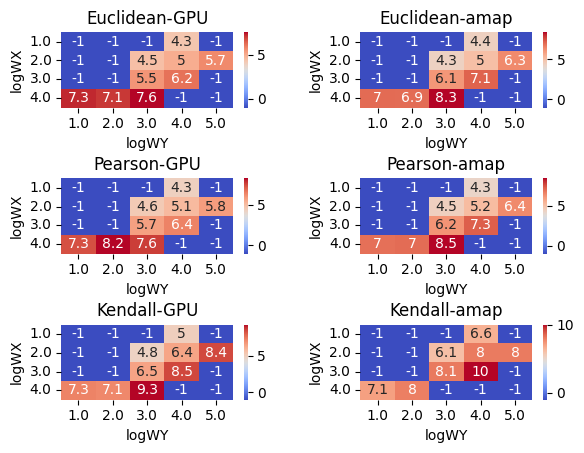

In [7]:
matrix1 = df[df['metric']=="euclidean"]
matrix1 = matrix1[matrix1["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
matrix1.fillna(-1,inplace=True)

matrix2 = df[df['metric']=="euclidean"]
matrix2 = matrix2[matrix2["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
matrix2.fillna(-1,inplace=True)

matrix3 = df[df['metric']=="pearson"]
matrix3 = matrix3[matrix3["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
matrix3.fillna(-1,inplace=True)

matrix4 = df[df['metric']=="pearson"]
matrix4 = matrix4[matrix4["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
matrix4.fillna(-1,inplace=True)

matrix5 = df[df['metric']=="kendall"]
matrix5 = matrix5[matrix5["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
matrix5.fillna(-1,inplace=True)

matrix6 = df[df['metric']=="kendall"]
matrix6 = matrix6[matrix6["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
matrix6.fillna(-1,inplace=True)

matrix7 = df[df['metric']=="kendall"]
matrix7 = matrix7[matrix7["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
matrix7.fillna(-1,inplace=True)

matrix8 = df[df['metric']=="euclidean"]
matrix8 = matrix8[matrix8["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
matrix8.fillna(-1,inplace=True)

matrix9 = df[df['metric']=="euclidean"]
matrix9 = matrix9[matrix9["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
matrix9.fillna(-1,inplace=True)

matrix10 = df[df['metric']=="pearson"]
matrix10 = matrix10[matrix10["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
matrix10.fillna(-1,inplace=True)

matrix11 = df[df['metric']=="pearson"]
matrix11 = matrix11[matrix11["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
matrix11.fillna(-1,inplace=True)

matrix12 = df[df['metric']=="kendall"]
matrix12 = matrix12[matrix12["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
matrix12.fillna(-1,inplace=True)

stdmtx = np.full((4, 5), 11)
 #stdmtx.isnull().astype(int)
#matrix2
#matrix1
fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix1, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Euclidean-GPU")
sns.heatmap(matrix2, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Euclidean-amap")
sns.heatmap(matrix3, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Pearson-GPU")
sns.heatmap(matrix4, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Pearson-amap")
sns.heatmap(matrix5, cmap="coolwarm", annot=True,ax=axs[2][0]).set_title("Kendall-GPU")
sns.heatmap(matrix6, cmap="coolwarm", annot=True,ax=axs[2][1]).set_title("Kendall-amap")
plt.savefig('colmat_bench_generated.png',dpi=200)

In [8]:
matrix1.fillna(-1)

logWY,1.0,2.0,3.0,4.0,5.0
logWX,,,,,
1.0,-1.000000,-1.000000,-1.000000,4.290299,-1.000000
2.0,-1.000000,-1.000000,4.508987,4.977272,5.718123
3.0,-1.000000,-1.000000,5.509660,6.151028,-1.000000
4.0,7.271231,7.079642,7.551375,-1.000000,-1.000000


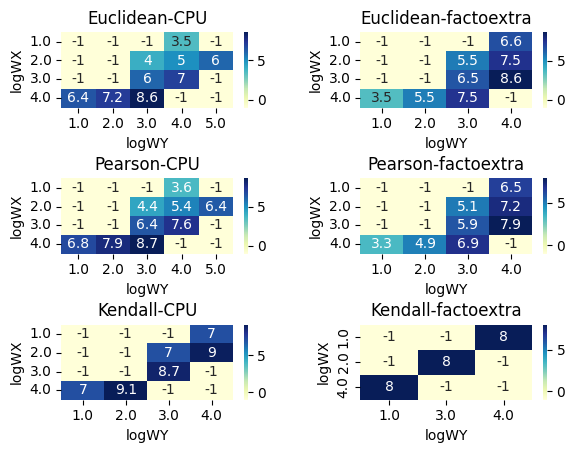

In [9]:
fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix8, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU")
sns.heatmap(matrix9, cmap="YlGnBu", annot=True,ax=axs[0][1]).set_title("Euclidean-factoextra")
sns.heatmap(matrix10, cmap="YlGnBu", annot=True,ax=axs[1][0]).set_title("Pearson-CPU")
sns.heatmap(matrix11, cmap="YlGnBu", annot=True,ax=axs[1][1]).set_title("Pearson-factoextra")
sns.heatmap(matrix7, cmap="YlGnBu", annot=True,ax=axs[2][0]).set_title("Kendall-CPU")
sns.heatmap(matrix12, cmap="YlGnBu", annot=True,ax=axs[2][1]).set_title("Kendall-factoextra")
plt.savefig('colmat_bench_generated.png',dpi=200)

In [7]:
# unF = df.DataFile.unique()
# print(unF)
# df1 = df[df['DataFile']==unF[0]]
# df2 = df[df['DataFile']==unF[1]]
# df3 = df[df['DataFile']==unF[2]]
# df4 = df[df['DataFile']==unF[3]]
# df5 = df[df['DataFile']==unF[4]]
# #df6 = df[df['DataFile']==unF[5]]
# df7 = df[df['DataFile']==unF[6]]
# df8 = df[df['DataFile']==unF[7]]
# df9 = df[df['DataFile']==unF[8]]
# df10 = df[df['DataFile']==unF[9]]

# fig, axes = plt.subplots(nrows=1,ncols=9)
# #for name, ax in zip(names, axes.flatten()):
# for i in axes:
#     i.tick_params(axis='x', rotation=90)
# sns.boxplot(data=df1, x="metric", y="logMeanTime",ax=axes[0])
# sns.boxplot(data=df2, x="metric", y="logMeanTime",ax=axes[1])
# sns.boxplot(data=df3, x="metric", y="logMeanTime",ax=axes[2])
# sns.boxplot(data=df4, x="metric", y="logMeanTime",ax=axes[3])
# sns.boxplot(data=df5, x="metric", y="logMeanTime",ax=axes[4])
# #sns.boxplot(data=df6, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df7, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df8, x="metric", y="logMeanTime",ax=axes[6])
# sns.boxplot(data=df9, x="metric", y="logMeanTime",ax=axes[7])
# sns.boxplot(data=df10, x="metric", y="logMeanTime",ax=axes[8])



['../DistanceBenchmarking/Generated/100_cells_100000_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv '
 '../DistanceBenchmarking/Generated/10000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_1000_genes.csv'
 '../../DistanceBenchmarking/Generated/10000_cells_100_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_100_genes.csv']


d:\ai-ml\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
d:\ai-ml\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
d:\ai-ml\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

(array([0, 1, 2]),
 [Text(0, 0, '100000'), Text(1, 0, '1000000'), Text(2, 0, '10000000')])

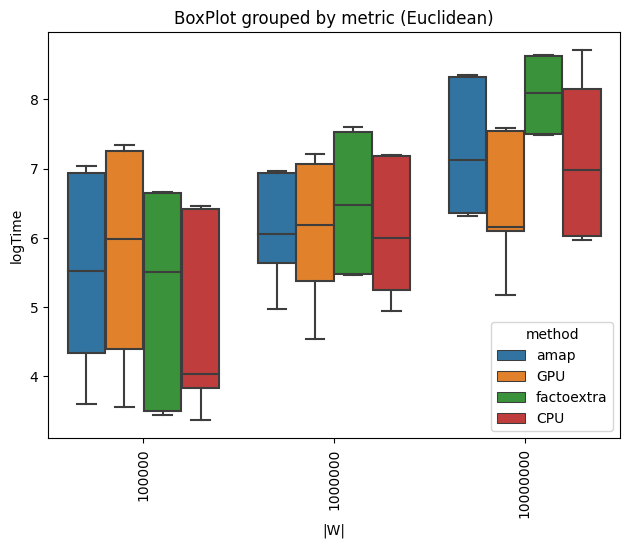

In [11]:
unF = df.DataFile.unique()
print(unF)
df1 = df[df['metric']=='euclidean']
df2 = df[df['metric']=='kendall']
df3 = df[df['metric']=='pearson']
df4 = df[df['metric']=='euclidean']
df5 = df[df['metric']=='kendall']
df6 = df[df['metric']=='pearson']
df7 = df[df['metric']=='euclidean']
df8 = df[df['metric']=='kendall']
df9 = df[df['metric']=='pearson']
df1['logTime'],df2['logTime'],df3['logTime'] = df1['logMeanTime'],df2['logMeanTime'],df3['logMeanTime']
df4['logTime'],df5['logTime'],df6['logTime'] = df4['logMinTime'],df5['logMinTime'],df6['logMinTime']
df7['logTime'],df8['logTime'],df9['logTime'] = df7['logMaxTime'],df8['logMaxTime'],df9['logMaxTime']
df_e = pd.concat([df1,df4,df7])

df_euc = pd.read_csv('box_euc.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_e,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Euclidean)')
plt.xticks(rotation=90)


In [12]:
df_k = pd.concat([df2,df5,df8])
df_p = pd.concat([df3,df6,df9])

(array([0, 1, 2]),
 [Text(0, 0, '100000'), Text(1, 0, '1000000'), Text(2, 0, '10000000')])

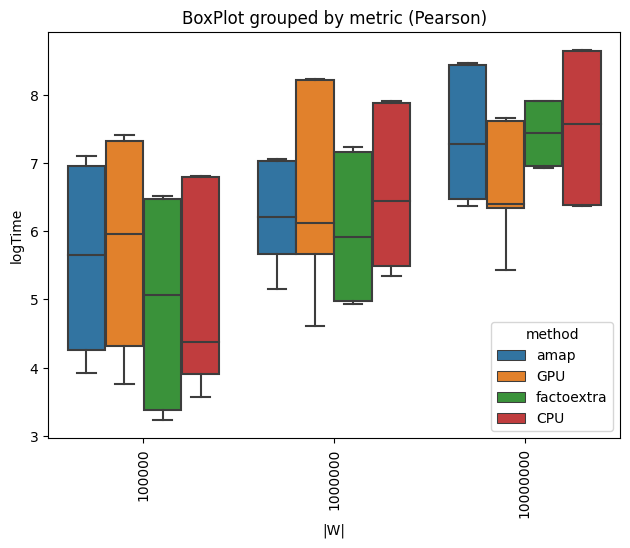

In [13]:
# df2.boxplot(column='logMeanTime',by="W")
# plt.tight_layout()
# plt.title('BoxPlot grouped by metric (Kendall)')
# plt.xticks(rotation=90)

df_pear = pd.read_csv('box_pear.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_p,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Pearson)')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, '100000'), Text(1, 0, '1000000'), Text(2, 0, '10000000')])

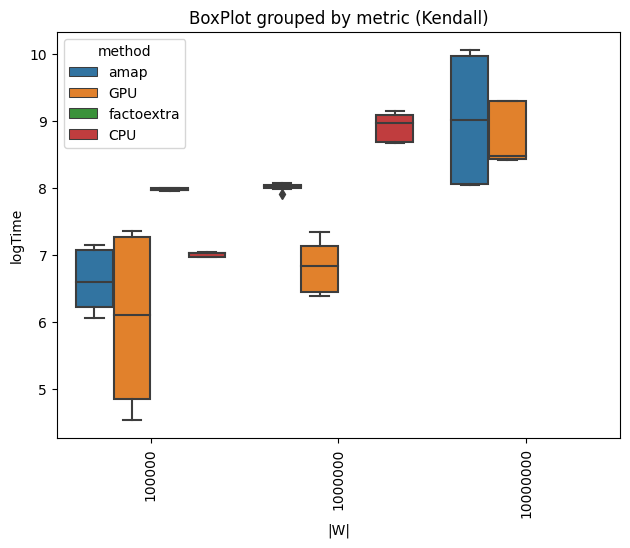

In [14]:
# df1.boxplot(column='logMeanTime',by="W")
# plt.tight_layout()
# plt.title('BoxPlot grouped by metric (Pearson)')
# plt.xticks(rotation=90)

df_kend = pd.read_csv('box_kend.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_k,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Kendall)')
plt.xticks(rotation=90)

In [17]:
# FOR PLOTTING RESULTS FOR REAL DATASETS

# plotData = df[df['IDtag']=="B_CD8_T_count_matrix"]
# sns.relplot(x="weight", y="logMinTime",hue='method',
#     size="metric", col="metric",
#     kind="line",data=plotData)

In [18]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# #log_val  type  metric  mean
# df = pd.read_csv('random.csv',delimiter='\t',header=None)
# print(df)

# def GenerateRandomData():
# 	pass

# def logScaleConvert(data):
#   data['logarithm_base10_W'] = np.log10(data[0])
#   data['logarithm_base10_M'] = np.log10(data[3])
#   return data

# log_scaled_df = logScaleConvert(df)
# print(log_scaled_df)
# #log_scaled_df=log_scaled_df.pivot('logarithm_base10_W')

# def plotLogScaleValues(log_data):
#   sns.set_style('whitegrid')
#   sample_count = np.around(np.logspace(math.log10(5),math.log10(10),6))
#   g_results=sns.lineplot(data=log_data['logarithm_base10_W'],dashes=0,markers=['o','o','o'])
#   g_results.set(xscale='log')
#   g_results.set(xticks=sample_count)
#   g_results.set(xticklabels=sample_count)

# #plotLogScaleValues(log_scaled_df)
# def plotCorrelationMatrix(data):
#   f, ax = plt.subplots(figsize=(9, 6))
#   sns.heatmap(data, annot=True, fmt="d", linewidths=.5, ax=ax)
# #log_scaled_d
# log_scaled_d = log_scaled_df['logarithm_base10_W']
# #log_scaled_d = log_scaled_df['logarithm_base10_M']

# plotCorrelationMatrix(log_scaled_d)

# plt.show()

# import pandas as pd 
# df = pd.read_csv('unt.csv',sep=" ")
# import matplotlib.pyplot as mp
# import pandas as pd
# import seaborn as sb
  
# data = df.pivot("metric","method","mean")
# dataplot = sb.heatmap(data, cmap="YlGnBu", annot=True)
  
# # displaying heatmap
# mp.show()
# df.to_csv('cleaned.csv')
# print(df)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

#df = pd.read_csv('matrix_real1.bench',sep=" ")
df = pd.read_csv(GENERATED_PATH)
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)

weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))

df['wX'] = w1
df['wY'] = w2
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
#df['IDtag'] = unID
#print(df[df['DataFile']])

ma=[]
for i in df['DataFile']:
    m=i.split('/')[-1].split('.')
    ma.append(m[0])
c=0
#for j in df['method']:
#    ma[c]= ma[c]+'_'+j
#    c+=1
#c=0
#for k in df['metric']:
#    ma[c]= ma[c]+'_'+k
#    c+=1

df['|W|']=ma

unF = df.DataFile.unique()
print(unF)
df1 = df[df['metric']=='euclidean']
df2 = df[df['metric']=='kendall']
df3 = df[df['metric']=='pearson']

['../DistanceBenchmarking/Generated/100_cells_100000_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv '
 '../DistanceBenchmarking/Generated/10000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_1000_genes.csv'
 '../../DistanceBenchmarking/Generated/10000_cells_100_genes.csv'
 '../DistanceBenchmarking/Generated/100000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_100_genes.csv']


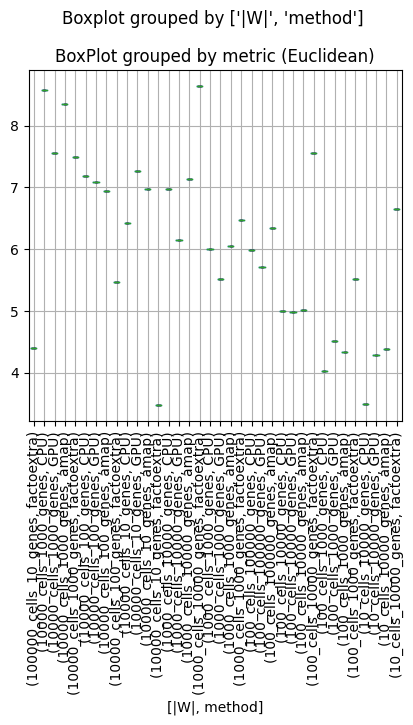

In [2]:
df1.boxplot(column='logMeanTime',by=["|W|","method"])
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Euclidean)')
plt.xticks(rotation=90)
plt.show()

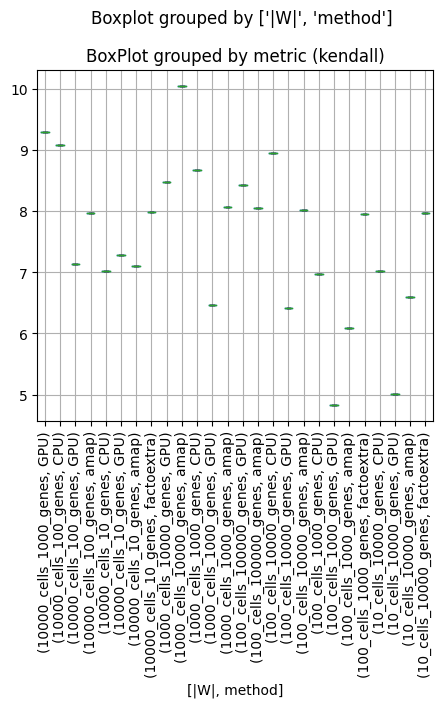

In [3]:
df2.boxplot(column='logMeanTime',by=["|W|","method"])
plt.tight_layout()
plt.title('BoxPlot grouped by metric (kendall)')
plt.xticks(rotation=90)
plt.show()

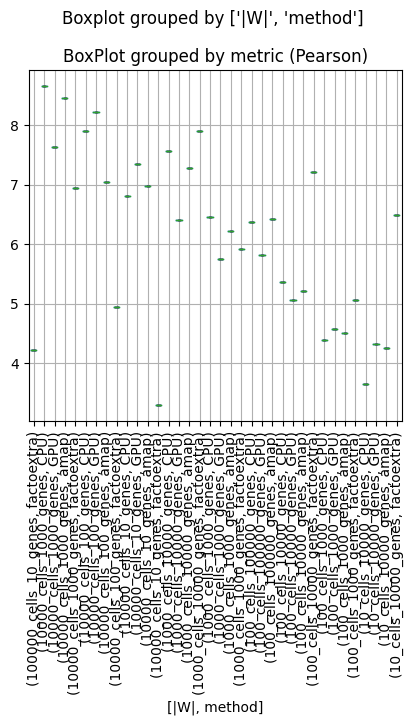

In [4]:
df3.boxplot(column='logMeanTime',by=["|W|","method"])
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Pearson)')
plt.xticks(rotation=90)
plt.show()

In [6]:
# unF = df.DataFile.unique()
# print(unF)
# df1 = df[df['DataFile']==unF[0]]
# df2 = df[df['DataFile']==unF[1]]
# df3 = df[df['DataFile']==unF[2]]
# df4 = df[df['DataFile']==unF[3]]
# df5 = df[df['DataFile']==unF[4]]
# #df6 = df[df['DataFile']==unF[5]]
# df7 = df[df['DataFile']==unF[6]]
# df8 = df[df['DataFile']==unF[7]]
# df9 = df[df['DataFile']==unF[8]]
# df10 = df[df['DataFile']==unF[9]]

# fig, axes = plt.subplots(nrows=1,ncols=9)
# #for name, ax in zip(names, axes.flatten()):
# for i in axes:
#     i.tick_params(axis='x', rotation=90)
# sns.boxplot(data=df1, x="metric", y="logMeanTime",ax=axes[0])
# sns.boxplot(data=df2, x="metric", y="logMeanTime",ax=axes[1])
# sns.boxplot(data=df3, x="metric", y="logMeanTime",ax=axes[2])
# sns.boxplot(data=df4, x="metric", y="logMeanTime",ax=axes[3])
# sns.boxplot(data=df5, x="metric", y="logMeanTime",ax=axes[4])
# #sns.boxplot(data=df6, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df7, x="metric", y="logMeanTime",ax=axes[5])
# sns.boxplot(data=df8, x="metric", y="logMeanTime",ax=axes[6])
# sns.boxplot(data=df9, x="metric", y="logMeanTime",ax=axes[7])
# sns.boxplot(data=df10, x="metric", y="logMeanTime",ax=axes[8])
# plt.tight_layout()
# plt.show()


## Generated Sparse Visualization

In [44]:
df = pd.read_csv(GENERATED_SPARSE_PATH,sep=" ")
#df = pd.read_csv('generatedData_bench_100iter.csv')
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,val_18,val_19,val_20,val_21,val_22,val_23,val_24,val_25,minTime,maxTime
0,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,7.621185e+06,1.448788e+06,1.454826e+07,7.146085e+06,7.471550e+06,7.480540e+06,...,7.322697e+06,7.360821e+06,7.138419e+06,7.328314e+06,7.352950e+06,7.291513e+06,7.263948e+06,7.390584e+06,7.128458e+06,1.454826e+07
1,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.107941e+06,1.498401e+06,8.300060e+06,8.431038e+05,8.089358e+05,8.124740e+05,...,8.063292e+05,8.058725e+05,8.299372e+05,8.088935e+05,8.062985e+05,7.965802e+05,7.957758e+05,8.003650e+05,7.957758e+05,8.300060e+06
2,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,pearson,4.610702e+06,1.501138e+06,1.181592e+07,4.346568e+06,4.312414e+06,4.337095e+06,...,4.308699e+06,4.302000e+06,4.301722e+06,4.300442e+06,4.299258e+06,4.305750e+06,4.300314e+06,4.302512e+06,4.299258e+06,1.181592e+07
3,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,6.784365e+06,1.524808e+06,1.409411e+07,6.623970e+06,6.440376e+06,6.510551e+06,...,6.526530e+06,6.426783e+06,6.513444e+06,6.453994e+06,6.478086e+06,6.494686e+06,6.352268e+06,6.458438e+06,6.352268e+06,1.409411e+07
4,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.120901e+06,1.510871e+06,8.371800e+06,8.565832e+05,8.111990e+05,8.175290e+05,...,8.244268e+05,8.269188e+05,8.116280e+05,8.502525e+05,8.106332e+05,8.216972e+05,6.971195e+05,8.209502e+05,6.971195e+05,8.371800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,2.983176e+06,4.091300e+03,2.994803e+06,2.989524e+06,2.985112e+06,2.983812e+06,...,2.980404e+06,2.979734e+06,2.980191e+06,2.980322e+06,2.980432e+06,2.980612e+06,2.980344e+06,2.980402e+06,2.979734e+06,2.994803e+06
367,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,3.005050e+06,1.098391e+04,3.045682e+06,3.011877e+06,3.010239e+06,3.004377e+06,...,2.999304e+06,2.999581e+06,3.000606e+06,2.999703e+06,2.999968e+06,2.999623e+06,2.999200e+06,3.000372e+06,2.999141e+06,3.045682e+06
368,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.488770e+09,1.466998e+06,5.492590e+09,5.488601e+09,5.487905e+09,5.487932e+09,...,5.487244e+09,5.488047e+09,5.487239e+09,5.487015e+09,5.487073e+09,5.489022e+09,5.489483e+09,5.488489e+09,5.487015e+09,5.492590e+09
369,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.968095e+09,1.381117e+06,5.968258e+09,5.968749e+09,5.968837e+09,5.969087e+09,...,5.967933e+09,5.968225e+09,5.969513e+09,5.967735e+09,5.967151e+09,5.968302e+09,5.971056e+09,5.971609e+09,5.965351e+09,5.971056e+09


In [45]:
weight=[]
unID=[]
w1=[]
w2=[]
w3 = []
w4= []
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-3].split('_')
    l = (i.split('/')[-3])
    j=i.split('/')[-1][:-4]
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(float(j))
    w4.append(l)

df['wX'] = w1
df['wY'] = w2
df['sparsity'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
df['id'] = w4
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,wY,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,7.621185e+06,1.448788e+06,1.454826e+07,7.146085e+06,7.471550e+06,7.480540e+06,...,1000,0.50,3.0,3.0,1000_cells_1000_genes,6.882022,6.852996,7.162811,1000000,kendall_GPU
1,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.107941e+06,1.498401e+06,8.300060e+06,8.431038e+05,8.089358e+05,8.124740e+05,...,1000,0.50,3.0,3.0,1000_cells_1000_genes,6.044517,5.900791,6.919081,1000000,euclidean_GPU
2,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,pearson,4.610702e+06,1.501138e+06,1.181592e+07,4.346568e+06,4.312414e+06,4.337095e+06,...,1000,0.50,3.0,3.0,1000_cells_1000_genes,6.663767,6.633393,7.072468,1000000,pearson_GPU
3,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,6.784365e+06,1.524808e+06,1.409411e+07,6.623970e+06,6.440376e+06,6.510551e+06,...,1000,0.75,3.0,3.0,1000_cells_1000_genes,6.831509,6.802929,7.149038,1000000,kendall_GPU
4,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.120901e+06,1.510871e+06,8.371800e+06,8.565832e+05,8.111990e+05,8.175290e+05,...,1000,0.75,3.0,3.0,1000_cells_1000_genes,6.049567,5.843307,6.922819,1000000,euclidean_GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,2.983176e+06,4.091300e+03,2.994803e+06,2.989524e+06,2.985112e+06,2.983812e+06,...,100,0.99,5.0,2.0,100000_cells_100_genes,6.474679,6.474177,6.476368,10000000,euclidean_factoextra
367,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,3.005050e+06,1.098391e+04,3.045682e+06,3.011877e+06,3.010239e+06,3.004377e+06,...,100,0.90,5.0,2.0,100000_cells_100_genes,6.477852,6.476997,6.483685,10000000,euclidean_factoextra
368,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.488770e+09,1.466998e+06,5.492590e+09,5.488601e+09,5.487905e+09,5.487932e+09,...,10,0.99,5.0,1.0,100000_cells_10_genes,9.739475,9.739336,9.739777,1000000,kendall_factoextra
369,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.968095e+09,1.381117e+06,5.968258e+09,5.968749e+09,5.968837e+09,5.969087e+09,...,10,0.95,5.0,1.0,100000_cells_10_genes,9.775836,9.775636,9.776051,1000000,kendall_factoextra


In [46]:
#df.to_csv('generated_without_sparsity.csv')
df2 = df.dropna()
dfr = pd.DataFrame()
dfr['method'] = df2['Method'] #df2['metric']+'_'+df2['method']
dfr['cells'] = df2['logWX']
dfr['peaks'] = df2['logWY']
dfr['logW'] = np.log10(df2['|W|'])
dfr['time'] = df2['logMeanTime']
dfr['sparsity'] = df2['sparsity']
dfr

method = 'euclidean'
method_lower = method.lower()

<AxesSubplot:xlabel='sparsity', ylabel='logMeanTime'>

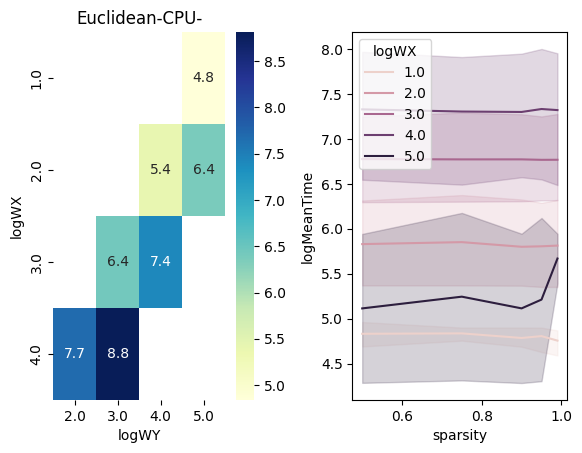

In [47]:
matrix = df[df['metric']=="pearson"]
matrix1= matrix[matrix["sparsity"]==0.50]
matrix1 = matrix1[matrix1["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')


fig, axs = plt.subplots(nrows=1,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix1, cmap="YlGnBu", annot=True,ax=axs[0]).set_title("Euclidean-CPU-")
#sns.lineplot(x="sparsity", y="logMeanTime",
#             hue="logWX", #style="event",
#             data=matrix,ax=axs[0][1])
sns.lineplot(x="sparsity", y="logMeanTime",
             hue="logWX", #style="event",
             data=matrix)

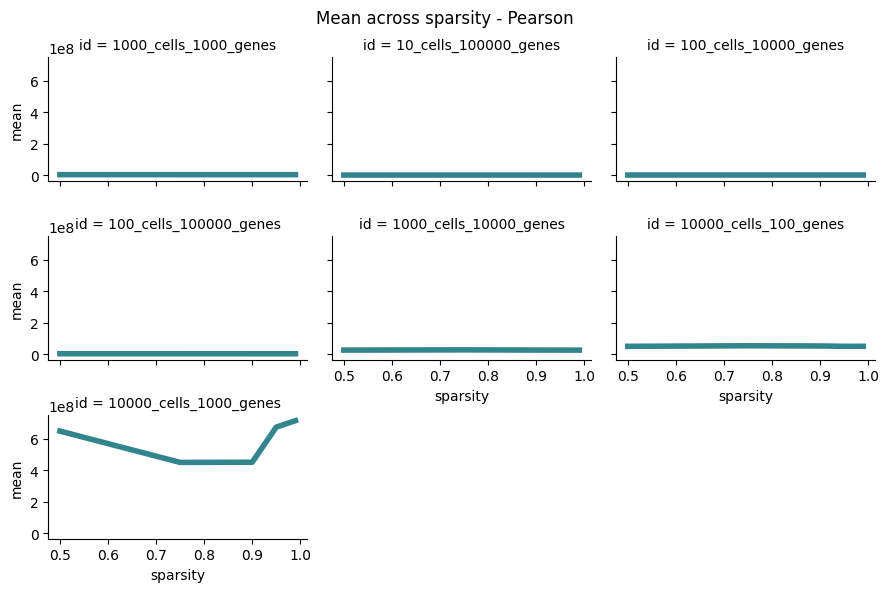

In [48]:
matrix = df[df['metric']=="pearson"]
matrix = matrix[matrix['method']=='CPU']

# g = sns.relplot(
#     data=matrix,
#     x="sparsity", y="mean", col="id", hue="method",
#     kind="line", palette="crest", linewidth=4, zorder=5,
#     col_wrap=3, height=2, aspect=1.5, legend=False,
# )
# g.fig.suptitle('Mean across sparsity - Pearson', fontsize=12)

g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Pearson', fontsize=12)
g.fig.subplots_adjust(top=0.9);

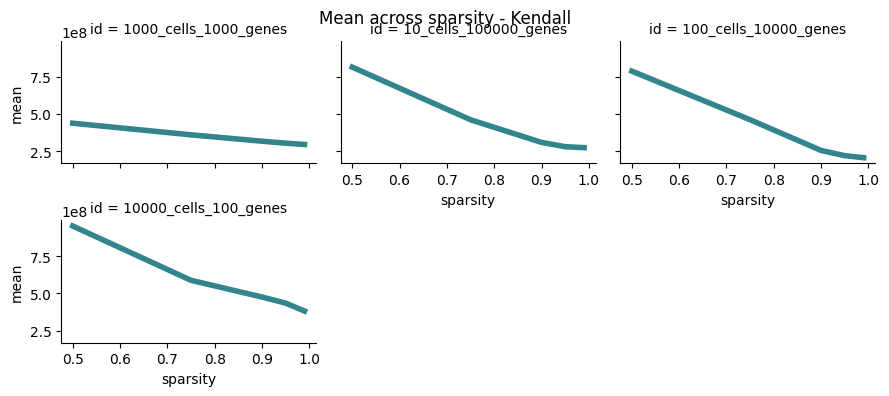

In [49]:
matrix = df[df['metric']=="kendall"]
matrix = matrix[matrix['method']=='CPU']

g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Kendall', fontsize=12)
g.fig.subplots_adjust(top=0.9);

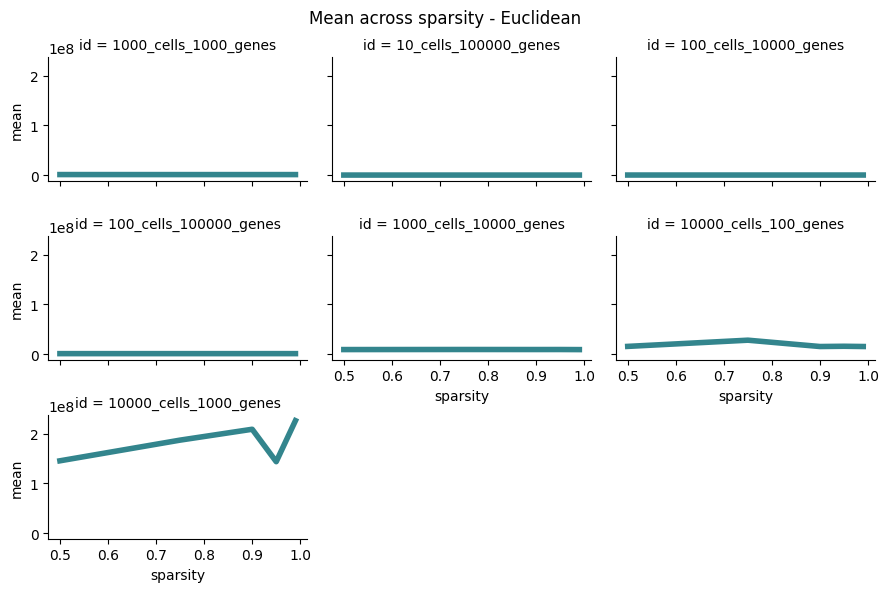

In [50]:
matrix = df[df['metric']=="euclidean"]
matrix = matrix[matrix['method']=='CPU']

# g = sns.relplot(
#     data=matrix,
#     x="sparsity", y="mean", col="id", hue="method",
#     kind="line", palette="crest", linewidth=4, zorder=5,
#     col_wrap=3, height=2, aspect=1.5, legend=False,
# )
# g.fig.suptitle('Mean across sparsity - Pearson', fontsize=12)

g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Euclidean', fontsize=12)
g.fig.subplots_adjust(top=0.9);

In [51]:
df = pd.read_csv(GENERATED_SPARSE_2_PATH,sep=" ")
#df = pd.read_csv('generatedData_bench_100iter.csv')
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
weight=[]
unID=[]
w1=[]
w2=[]
w3 = []
w4= []
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-2].split('_')
    j=i.split('/')[-1][:-4]
    l = (i.split('/')[-2])
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(float(j))
    w4.append(l)

df['wX'] = w1
df['wY'] = w2
df['sparsity'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
df['id'] = w4
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['invSparsity']=np.log10(1-df['sparsity'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,invSparsity,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,6.373376e+04,7.106440e+04,4.827575e+04,1.114865e+05,2.322845e+05,2.547625e+04,...,0.99,3.0,3.0,1000_cells_1000_genes,4.804370,4.283256,5.366020,-2.00000,1000000,pearson_CPU_Sp
1,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,6.995854e+04,6.876221e+04,5.212450e+04,1.058560e+05,1.830938e+05,3.089800e+04,...,0.95,3.0,3.0,1000_cells_1000_genes,4.844841,4.424502,5.340164,-1.30103,1000000,pearson_CPU_Sp
2,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,7.861751e+04,8.368728e+04,5.944550e+04,1.202570e+05,2.277360e+05,3.619075e+04,...,0.99,3.0,3.0,1000_cells_1000_genes,4.895519,4.443693,5.435588,-2.00000,1000000,euclidean_CPU_Sp
3,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,9.448525e+04,7.781663e+04,6.888225e+04,1.050982e+05,2.055892e+05,5.563100e+04,...,0.90,3.0,3.0,1000_cells_1000_genes,4.975364,4.554625,5.398681,-1.00000,1000000,pearson_CPU_Sp
4,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,1.385290e+05,7.370320e+04,1.308148e+05,2.398278e+05,2.858022e+05,9.634875e+04,...,0.95,3.0,3.0,1000_cells_1000_genes,5.141541,4.946840,5.456802,-1.30103,1000000,euclidean_CPU_Sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,4.817599e+07,8.554826e+06,4.598121e+07,4.191384e+07,5.285951e+07,5.130624e+07,...,0.95,3.0,4.0,1000_cells_10000_genes,7.682831,7.615695,7.872543,-1.30103,10000000,euclidean_CPU_Sp
86,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,7.134775e+07,9.993926e+06,9.768541e+07,1.017334e+08,8.965481e+07,7.300138e+07,...,0.90,3.0,4.0,1000_cells_10000_genes,7.853380,7.817621,8.007464,-1.00000,10000000,euclidean_CPU_Sp
87,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,8.157149e+07,4.065022e+06,8.440614e+07,8.362546e+07,7.968925e+07,8.126578e+07,...,0.50,3.0,4.0,1000_cells_10000_genes,7.911538,7.878566,7.966874,-0.30103,10000000,pearson_CPU_Sp
88,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,1.436580e+08,1.815745e+07,1.544098e+08,2.137308e+08,1.403733e+08,1.808756e+08,...,0.75,3.0,4.0,1000_cells_10000_genes,8.157330,8.119248,8.329867,-0.60206,10000000,euclidean_CPU_Sp


In [52]:
matrix_sp = df[df['metric']=="pearson"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
#matrix1= matrix[matrix["sparsity"]==0.50]
matrix_sp
#matrix1 = matrix1[matrix1["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')


# fig, axs = plt.subplots(nrows=2,ncols=2)
# plt.tight_layout(pad=3.0)
# sns.heatmap(matrix1, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU-")
# #sns.lineplot(x="sparsity", y="logMeanTime",
# #             hue="logWX", #style="event",
# #             data=matrix,ax=axs[0][1])
# sns.lineplot(x="sparsity", y="logMeanTime",
#              hue="logWX", #style="event",
#              data=matrix)

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,invSparsity,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,63733.76,7.106440e+04,48275.75,111486.50,232284.50,25476.25,...,0.99,3.0,3.0,1000_cells_1000_genes,4.804370,4.283256,5.366020,-2.00000,1000000,pearson_CPU_Sp
1,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,69958.54,6.876221e+04,52124.50,105856.00,183093.75,30898.00,...,0.95,3.0,3.0,1000_cells_1000_genes,4.844841,4.424502,5.340164,-1.30103,1000000,pearson_CPU_Sp
3,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,94485.25,7.781663e+04,68882.25,105098.25,205589.25,55631.00,...,0.90,3.0,3.0,1000_cells_1000_genes,4.975364,4.554625,5.398681,-1.00000,1000000,pearson_CPU_Sp
5,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,161324.75,9.704279e+04,414857.25,311513.50,312786.25,290597.00,...,0.75,3.0,3.0,1000_cells_1000_genes,5.207701,4.978216,5.617899,-0.60206,1000000,pearson_CPU_Sp
7,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,383282.37,1.316565e+05,853459.75,517742.50,472182.50,297051.75,...,0.50,3.0,3.0,1000_cells_1000_genes,5.583519,5.429762,5.931183,-0.30103,1000000,pearson_CPU_Sp
11,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,57861.52,4.860106e+04,47283.25,180145.00,35124.00,130181.25,...,0.95,3.0,3.0,1000_cells_1000_genes,4.762390,4.379799,5.255622,-1.30103,1000000,pearson_CPU_Sp
12,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,52414.66,5.385835e+04,41903.00,80397.50,159402.00,22781.75,...,0.99,3.0,3.0,1000_cells_1000_genes,4.719453,4.264570,5.210756,-2.00000,1000000,pearson_CPU_Sp
13,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,75447.24,5.249101e+04,60340.25,86884.50,155113.25,46495.25,...,0.90,3.0,3.0,1000_cells_1000_genes,4.877643,4.540367,5.220359,-1.00000,1000000,pearson_CPU_Sp
15,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,125719.55,5.772407e+04,266714.50,206979.75,214660.75,206072.25,...,0.75,3.0,3.0,1000_cells_1000_genes,5.099403,4.938552,5.426047,-0.60206,1000000,pearson_CPU_Sp
17,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,320286.03,6.981574e+04,538112.25,367205.50,370876.25,260156.75,...,0.50,3.0,3.0,1000_cells_1000_genes,5.505538,5.400865,5.730873,-0.30103,1000000,pearson_CPU_Sp


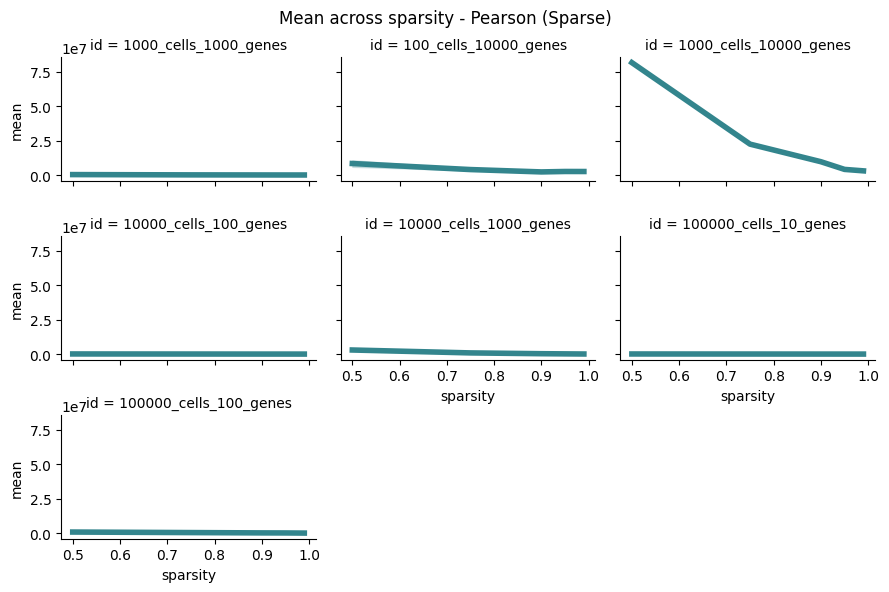

In [53]:
g = sns.relplot(
    data=matrix_sp,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Pearson (Sparse)', fontsize=12)
g.fig.subplots_adjust(top=0.9);

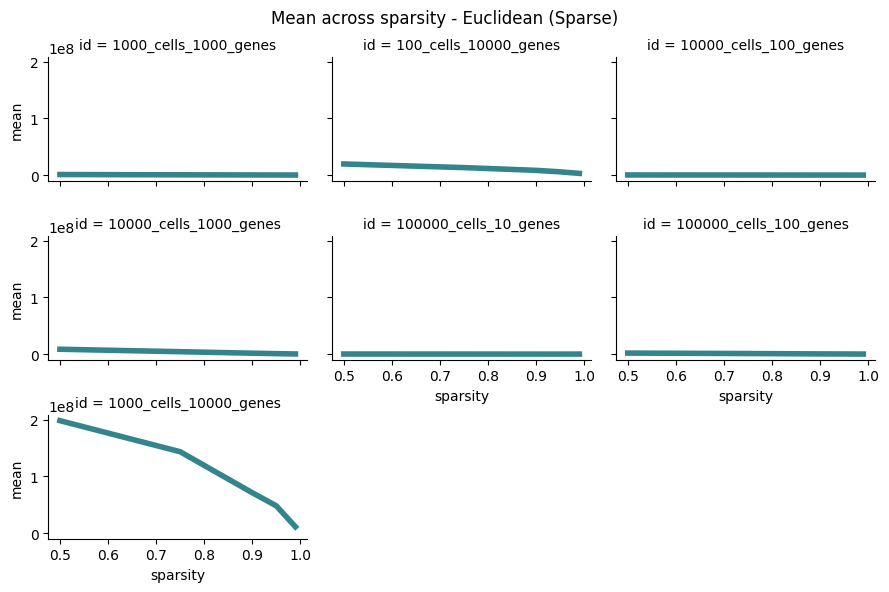

In [54]:
matrix_sp = df[df['metric']=="euclidean"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']

g = sns.relplot(
    data=matrix_sp,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Euclidean (Sparse)', fontsize=12)
g.fig.subplots_adjust(top=0.9);

In [55]:
df2 = df.dropna()
dfl = pd.DataFrame()
dfl['method'] = df2['Method'] #df2['metric']+'_'+df2['method']
dfl['cells'] = df2['logWX']
dfl['peaks'] = df2['logWY']
dfl['logW'] = np.log10(df2['|W|'])
dfl['time'] = df2['logMeanTime']
dfl['sparsity'] = df2['sparsity']


method = 'euclidean'
method_lower = method.lower()
dfl

,method,cells,peaks,logW,time,sparsity
0,pearson_CPU_Sp,3.0,3.0,6.0,4.804370,0.99
1,pearson_CPU_Sp,3.0,3.0,6.0,4.844841,0.95
2,euclidean_CPU_Sp,3.0,3.0,6.0,4.895519,0.99
3,pearson_CPU_Sp,3.0,3.0,6.0,4.975364,0.90
4,euclidean_CPU_Sp,3.0,3.0,6.0,5.141541,0.95
...,...,...,...,...,...,...
85,euclidean_CPU_Sp,3.0,4.0,7.0,7.682831,0.95
86,euclidean_CPU_Sp,3.0,4.0,7.0,7.853380,0.90
87,pearson_CPU_Sp,3.0,4.0,7.0,7.911538,0.50
88,euclidean_CPU_Sp,3.0,4.0,7.0,8.157330,0.75


In [56]:
from matplotlib.colors import BoundaryNorm
cmap = plt.get_cmap()
cmap.N
norm_p      = BoundaryNorm(np.linspace(3, 11.0, 19), ncolors=cmap.N, clip=True)
norm_s      = BoundaryNorm(np.linspace(0, 1.0, 19), ncolors=cmap.N, clip=True)

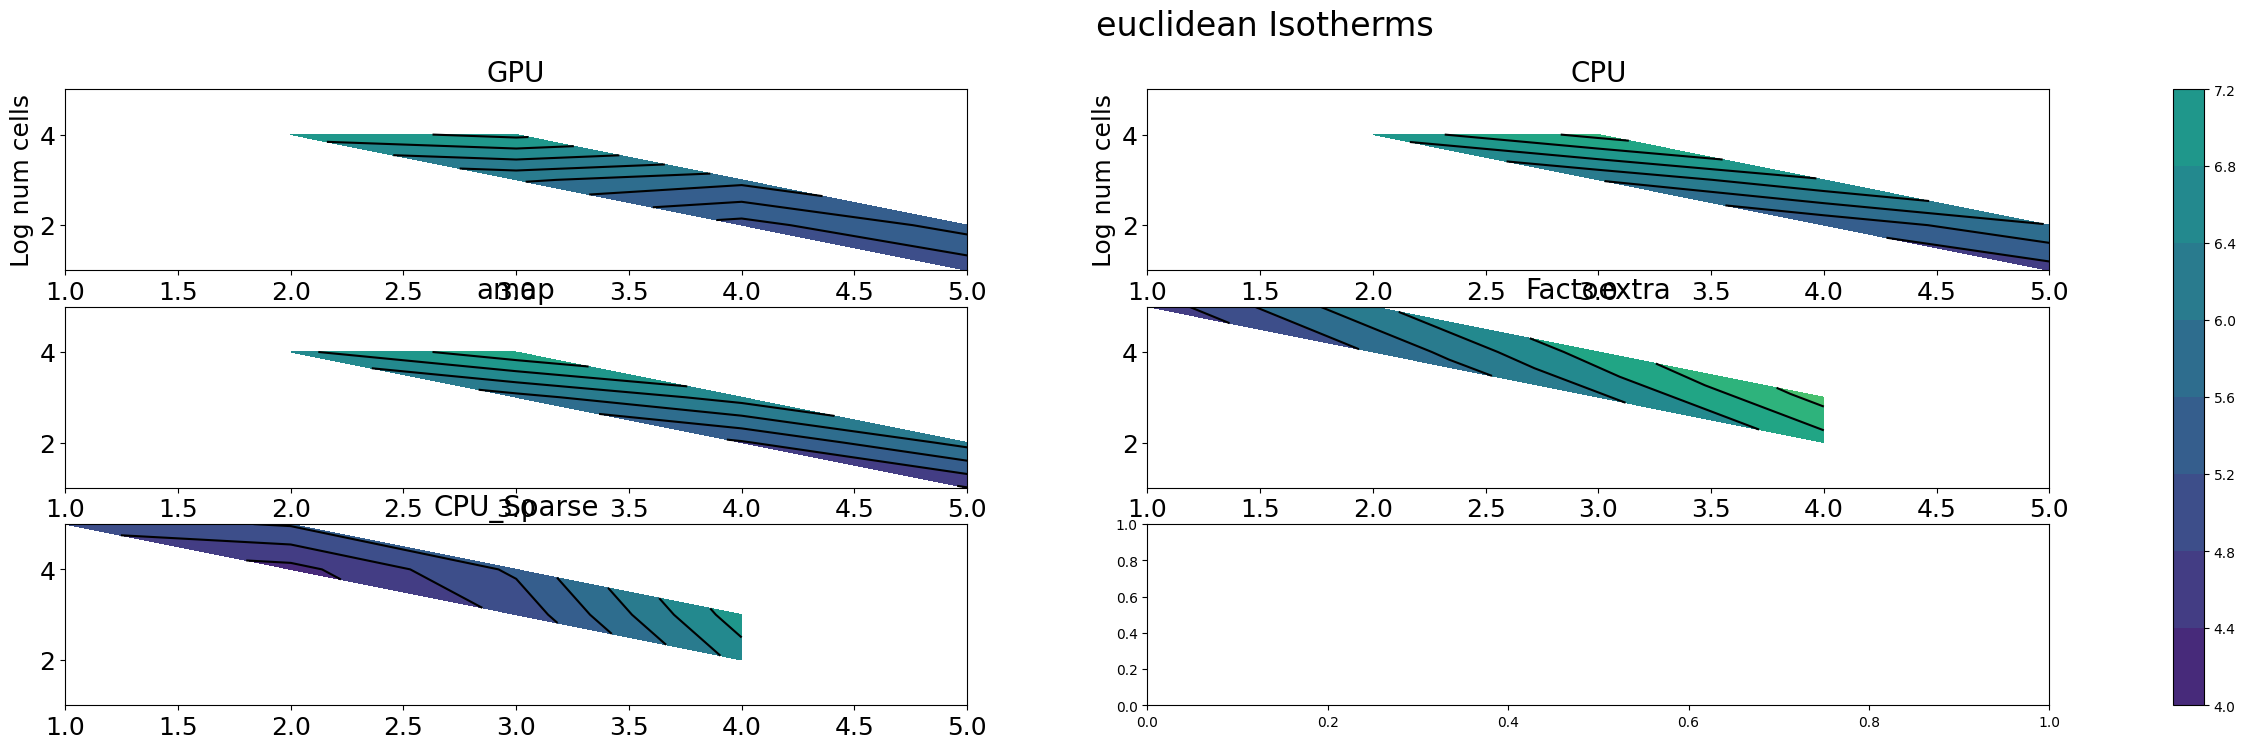

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_GPU']

current_axis = ax[0][0]
current_axis.set_title('GPU', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('Log num genes', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0][1]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('Log num genes', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_amap']
current_axis = ax[1][0]
current_axis.set_title(f'amap', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('Log num genes', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_factoextra']
#print(current_dfr)
current_axis = ax[1][1]
current_axis.set_title('Factoextra', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[2][0]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(1.0, 5.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.peaks,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.peaks,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)


fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

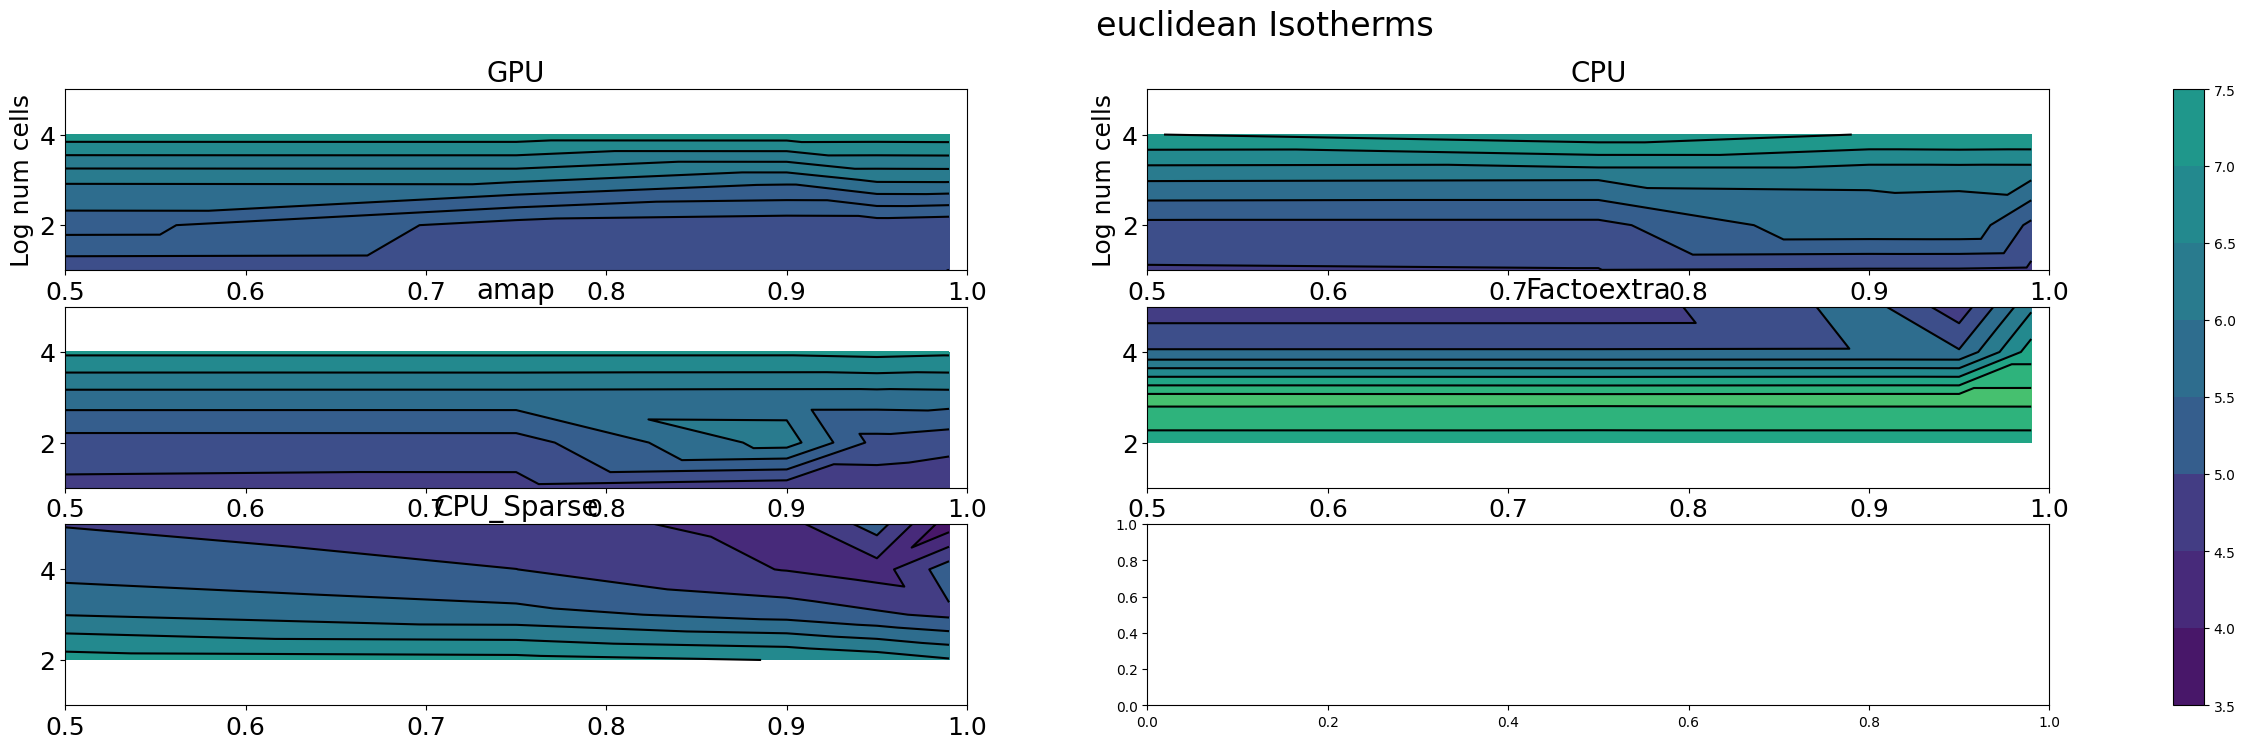

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_GPU']

current_axis = ax[0][0]
current_axis.set_title('GPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0][1]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_amap']
current_axis = ax[1][0]
current_axis.set_title(f'amap', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfr[dfr.method == f'{method_lower}_factoextra']
#print(current_dfr)
current_axis = ax[1][1]
current_axis.set_title('Factoextra', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[2][0]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(1.0, 5.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.cells,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.cells,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

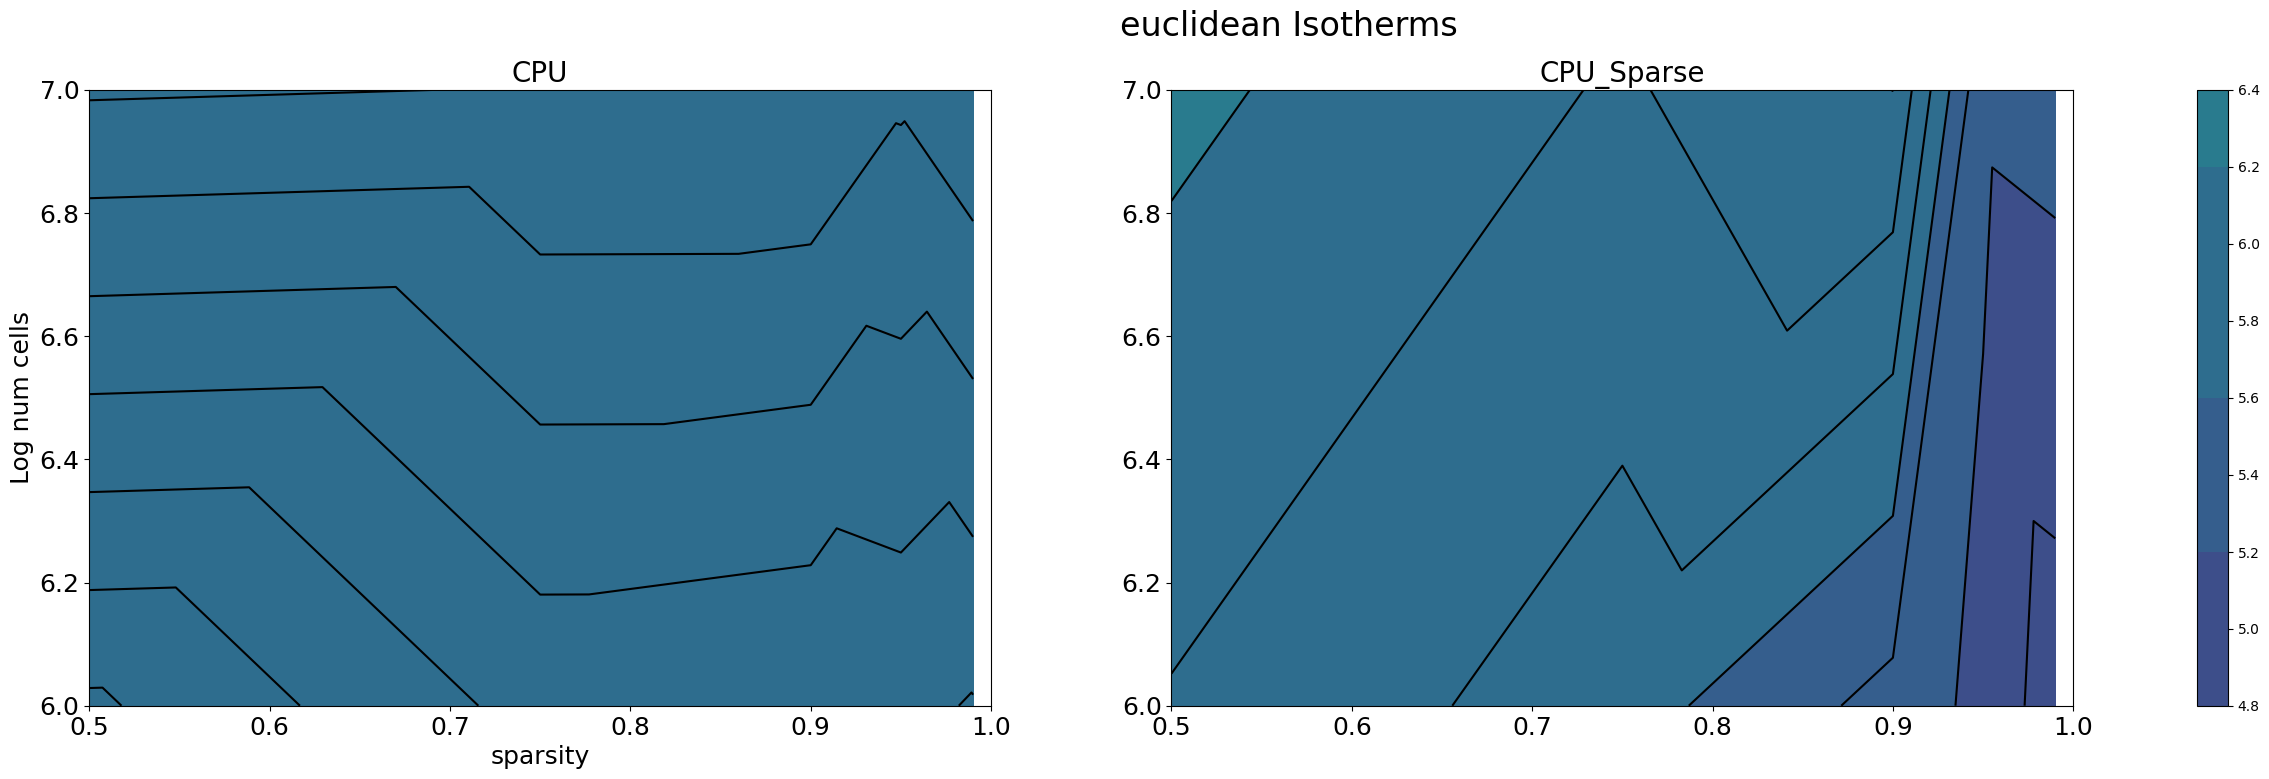

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[1]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

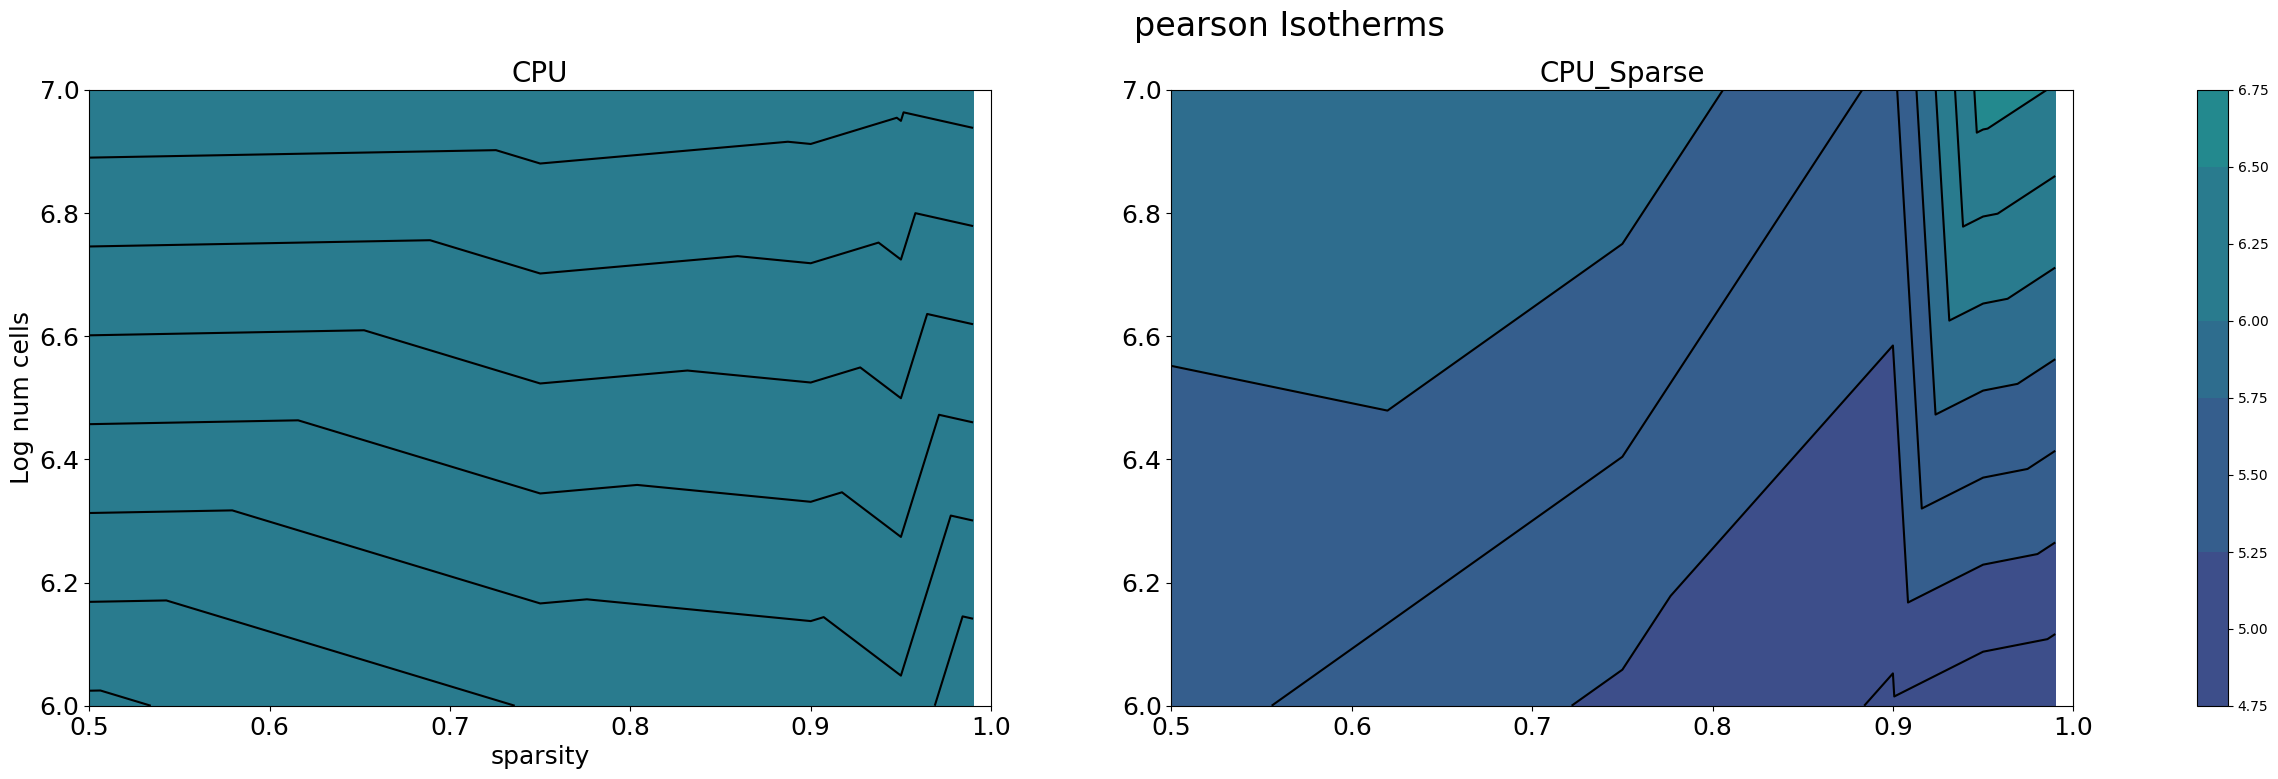

In [60]:
method = 'pearson'
method_lower = method.lower()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[1]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

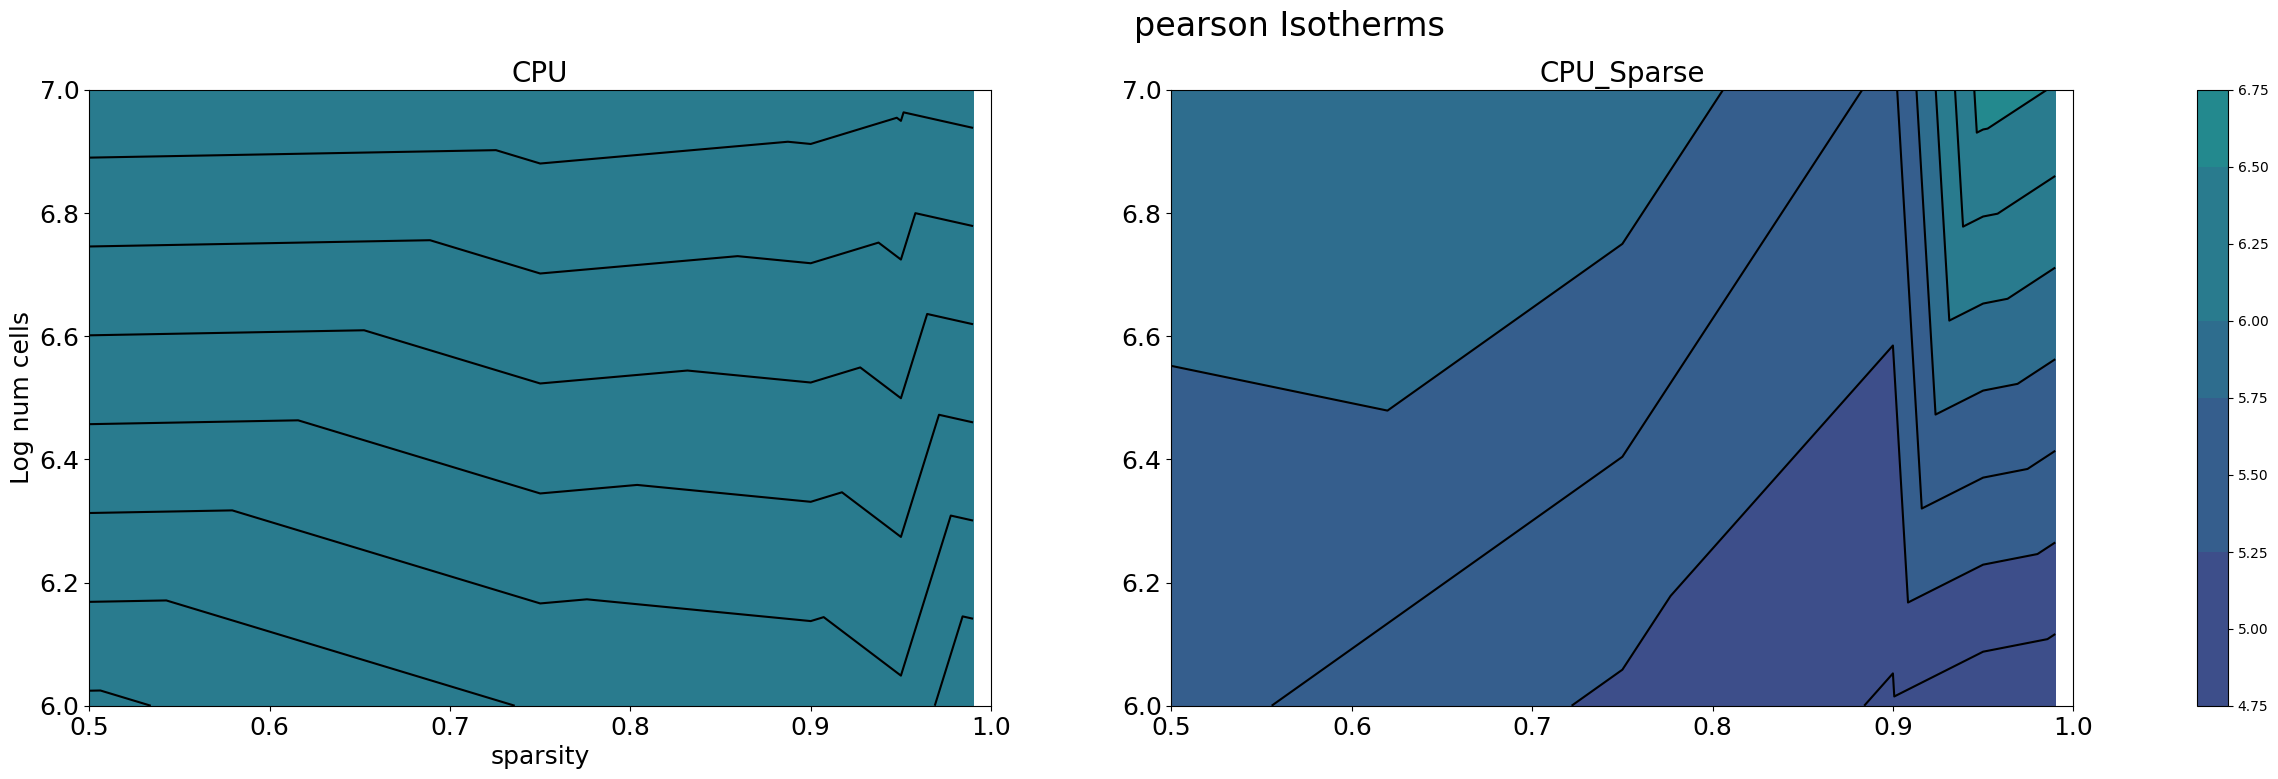

In [61]:
method = 'pearson'
method_lower = method.lower()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))
fig.suptitle(f'{method} Isotherms', fontsize=24)

current_dfr = dfr[dfr.method == f'{method_lower}_CPU']
#print(current_dfr)
current_axis = ax[0]
current_axis.set_title('CPU', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.set_xlabel('sparsity', fontsize=18)
current_axis.set_ylabel('Log num cells', fontsize=18)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)
# fig.colorbar(tcf)
contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

current_dfr = dfl[dfl.method == f'{method_lower}_CPU_Sp']
#print(current_dfr)
current_axis = ax[1]
current_axis.set_title('CPU_Sparse', fontsize=20)
current_axis.set_xlim(0.5, 1.0)
current_axis.set_ylim(6.0, 7.0)
current_axis.tick_params(axis='x', labelsize=18)
current_axis.tick_params(axis='y', labelsize=18)
# current_axis.set_ylabel('Log num cells', fontsize=18)
tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.time, norm=norm_p)

contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.time, colors='k', norm=norm_p)

fig.colorbar(tcf, ax=ax)
plt.savefig(f'Isotherm{method}.png', bbox_inches='tight')

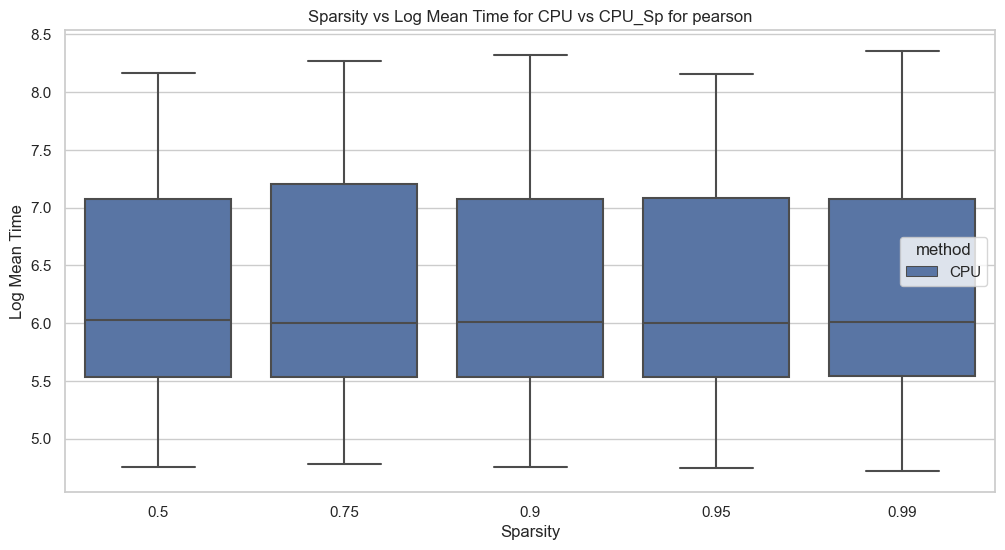

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (replace 'data.csv' with your actual data file)
data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for CPU vs CPU_Sp for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


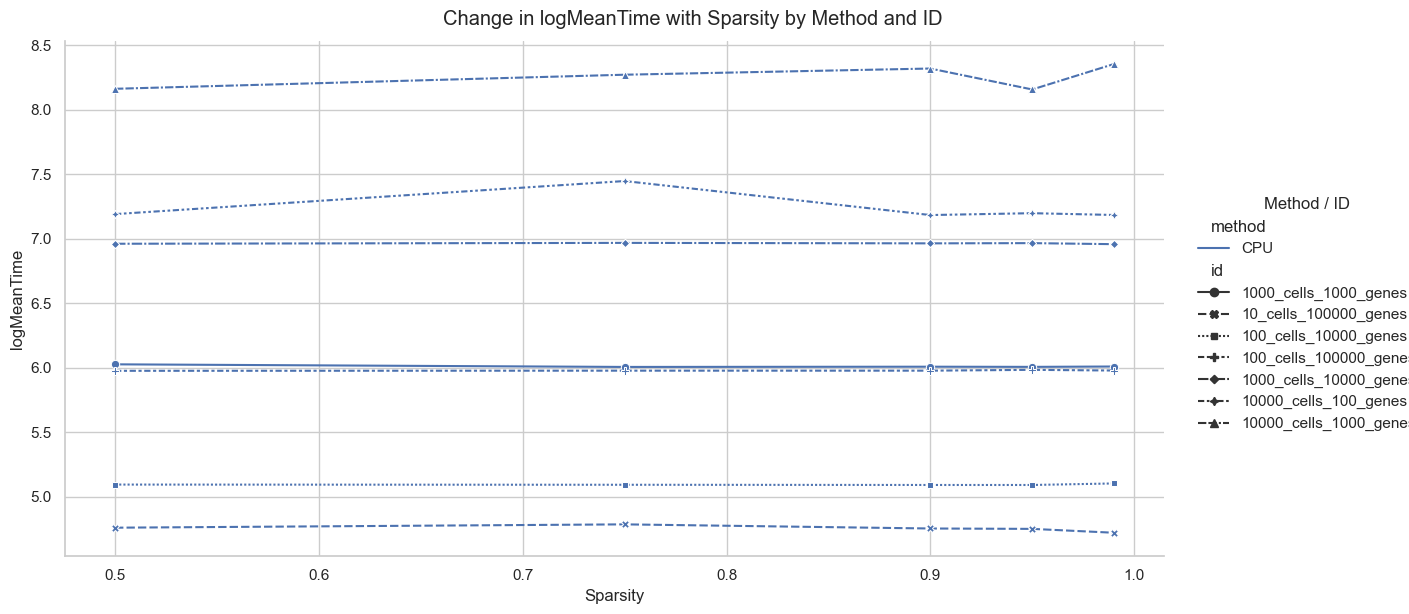

In [63]:
data_columns = ['method', 'sparsity', 'id', 'logMeanTime']
data = matrix[data_columns]

# Create the plot using Seaborn's relplot
plot = sns.relplot(
    data=data,
    x='sparsity', y='logMeanTime', hue='method',
    style='id', kind='line', markers=True,
    aspect=2, height=6
)

# Set plot title and labels
plot.fig.suptitle("Change in logMeanTime with Sparsity by Method and ID", y=1.02)
plot.set(xlabel="Sparsity", ylabel="logMeanTime")

# Customize legend position and title
plot._legend.set_bbox_to_anchor((1, 0.5))
plot._legend.set_title("Method / ID")

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = matrix
data['invSp'] = np.log10(1-data['sparsity'])

# Create a relplot using Seaborn
g = sns.relplot(
    data=data,
    x="invSp",
    y="logMeanTime",
    hue="method",
    col="id",
    kind="line",
    facet_kws={"sharey": False},  # Allow different y-axes ranges for each subplot
    height=4,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    col_wrap=3
)

# Customize plot aesthetics
g.set_axis_labels("Sparsity", "Log Mean Time")
g.set_titles("ID: {col_name}")
g.set(yscale="log")  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = matrix
data['invSp'] = np.log10(1-data['sparsity'])
data['accTime'] = data

# Create a relplot using Seaborn
g = sns.relplot(
    data=data,
    x="invSp",
    y="logMeanTime",
    hue="method",
    col="id",
    kind="line",
    facet_kws={"sharey": False},  # Allow different y-axes ranges for each subplot
    height=4,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    col_wrap=3
)

# Customize plot aesthetics
g.set_axis_labels("Sparsity", "Log Mean Time")
g.set_titles("ID: {col_name}")
g.set(yscale="log")  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()

ValueError: Wrong number of items passed 45, placement implies 1